# **1.Conectamos Colab con Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir("/content/drive/MyDrive/Proyectos-independientes/Proyecto-MINSA/Dataset/Clasificacion/HGG-LGG/NII")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from skimage import io
import glob
import nibabel as nib

In [4]:
data_videos = "./AVI"
VIDEO_PATH = "/content/drive/MyDrive/Proyectos-independientes/Proyecto-MINSA/Dataset/Clasificacion/HGG-LGG/AVI"

In [ ]:
list_data = os.listdir("./")

# **2.Ejemplo**

In [5]:
image_path = "./HGG_Training_001_total.nii"
image_obj = nib.load(image_path)

In [6]:
image_data = image_obj.get_fdata()

In [ ]:
print("alto, ancho, profundidad")
print(image_data.shape)

alto, ancho, profundidad
(240, 240, 155, 4)


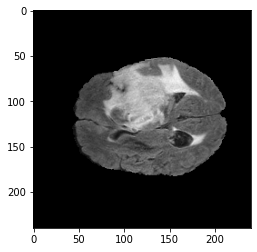

In [7]:
plt.imshow(image_data[:,:,75,0],cmap='gray')
plt.show()

# **3.Proceso en batch**

In [ ]:
fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
for i in range(len(list_data)):
  name = list_data[i]
  link = VIDEO_PATH + "/" + str(name)[:-4] + ".mp4"
  print(link)
  out = cv2.VideoWriter(link, fourcc, 30, (240, 240),isColor = False)

  image_obj = nib.load(list_data[i])
  image_data = image_obj.get_fdata()
  
  # Seleccionamos solo FLAIR
  images_bin =[] ## Arreglo donde van los cortes
  
  for i in range(image_data.shape[2]):
    ## Grises
    corte = cv2.normalize(image_data[:, :, i, 0], None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F).astype(np.uint8) # Corte de profundidad i
    # print(corte.shape)
    images_bin.append(corte)
  
  for frame_bin in images_bin:
    out.write(frame_bin) # escribimos los frames en el video
  out.release()
  print("Video guardado exitosamente!",name)
print("Fin")

/content/drive/MyDrive/Proyectos-independientes/Proyecto-MINSA/Dataset/Clasificacion/HGG-LGG/AVI/HGG_Training_001_total.mp4
Video guardado exitosamente! HGG_Training_001_total.nii
/content/drive/MyDrive/Proyectos-independientes/Proyecto-MINSA/Dataset/Clasificacion/HGG-LGG/AVI/HGG_Training_002_total.mp4
Video guardado exitosamente! HGG_Training_002_total.nii
/content/drive/MyDrive/Proyectos-independientes/Proyecto-MINSA/Dataset/Clasificacion/HGG-LGG/AVI/HGG_Training_003_total.mp4
Video guardado exitosamente! HGG_Training_003_total.nii
/content/drive/MyDrive/Proyectos-independientes/Proyecto-MINSA/Dataset/Clasificacion/HGG-LGG/AVI/HGG_Training_004_total.mp4
Video guardado exitosamente! HGG_Training_004_total.nii
/content/drive/MyDrive/Proyectos-independientes/Proyecto-MINSA/Dataset/Clasificacion/HGG-LGG/AVI/HGG_Training_005_total.mp4
Video guardado exitosamente! HGG_Training_005_total.nii
/content/drive/MyDrive/Proyectos-independientes/Proyecto-MINSA/Dataset/Clasificacion/HGG-LGG/AVI/HGG